<a href="https://colab.research.google.com/github/deepakgoswami7/DEEPAK-GOSWAMI-CS-2023-B-ID-19/blob/main/LIVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIVER DISEASE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv(r'/content/IndianLiverPatientDataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
dataset['gender'] = dataset['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [ ]:
dataset.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
dataset['alkphos']=imp.fit_transform(dataset[['alkphos']])

In [ ]:
dataset.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [ ]:
dataset.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


([<matplotlib.axis.YTick at 0x7fb62ff979d0>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'gender'),
  Text(0, 0, 'tot_bilirubin'),
  Text(0, 0, 'direct_bilirubin'),
  Text(0, 0, 'tot_proteins'),
  Text(0, 0, 'albumin'),
  Text(0, 0, 'ag_ratio'),
  Text(0, 0, 'sgpt'),
  Text(0, 0, 'sgot'),
  Text(0, 0, 'alkphos'),
  Text(0, 0, 'is_patient')])

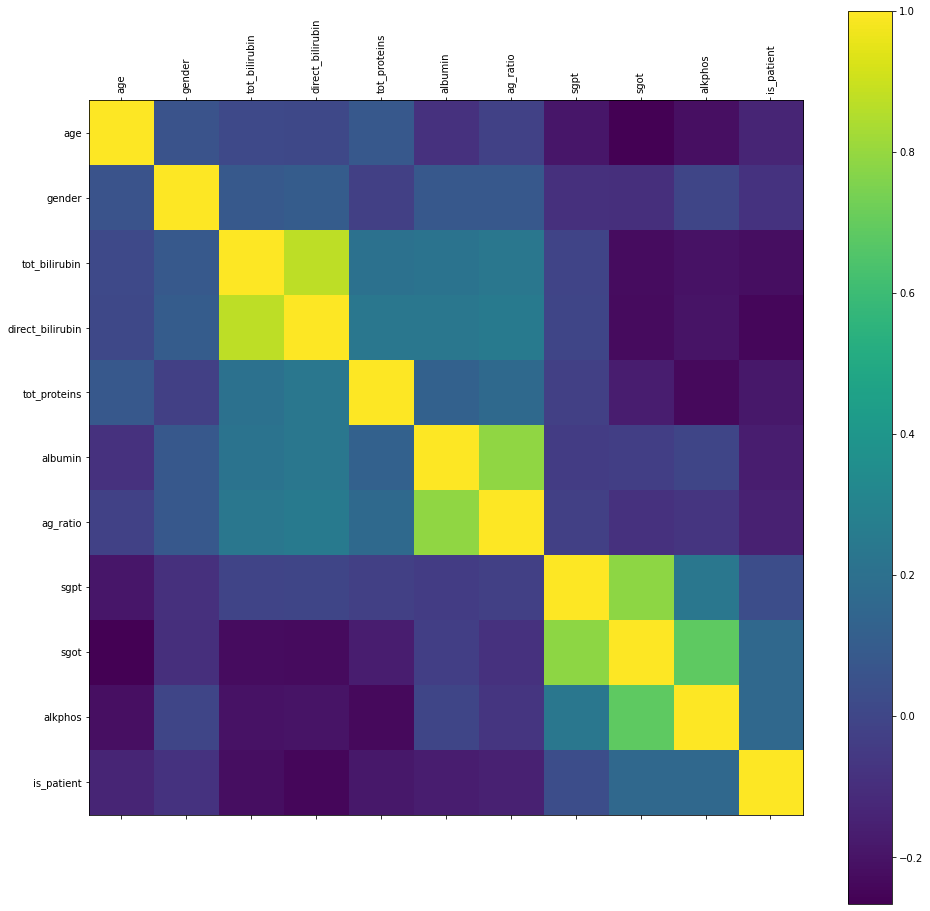

In [ ]:
rcParams['figure.figsize'] = 16, 16
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(dataset.shape[1]), dataset.columns, rotation = 'vertical')
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb62f767790>,
      dtype=object)

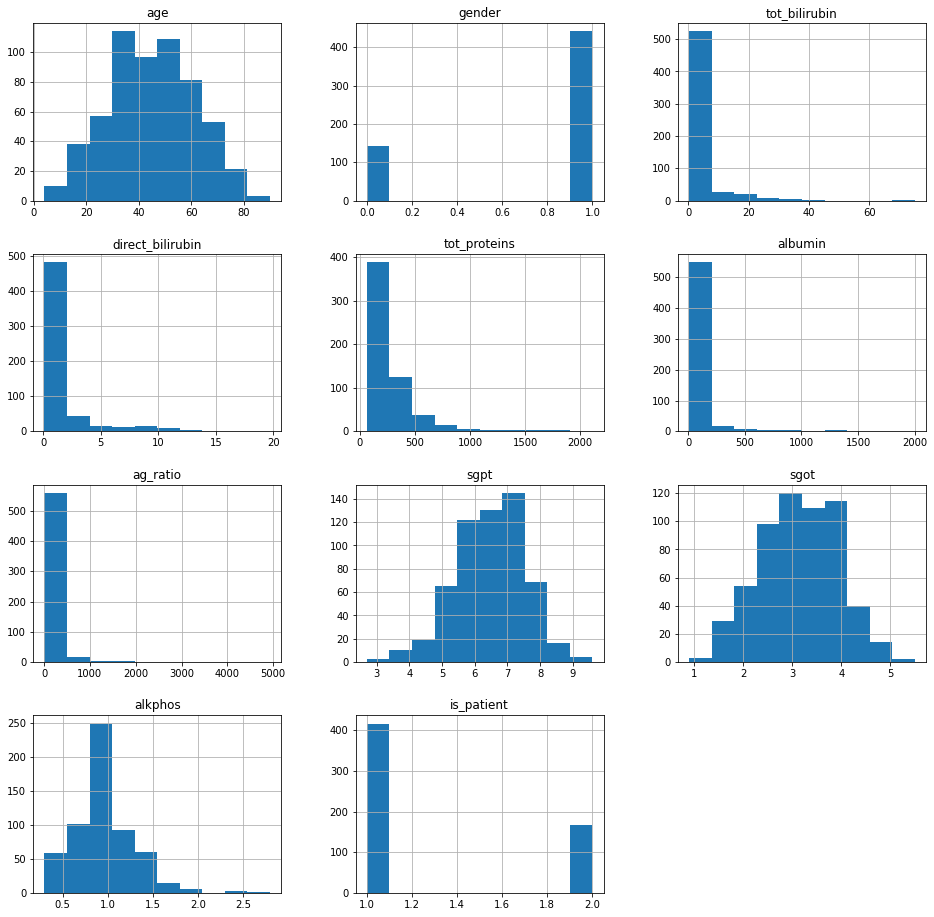

In [ ]:
dataset.hist()

In [ ]:
dataset.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
StdSclr = StandardScaler()
columns = ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [ ]:
y = dataset['is_patient']
x = dataset.drop(['is_patient'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.26, random_state = 1)

In [ ]:
#LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 73.03


In [ ]:
#K-Neighbours
knn_score_lst = []
for i in range(4, 10):    
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))

In [ ]:
print(knn_score_lst)

[64.47, 61.18, 63.16, 63.82, 63.82, 63.82]


([<matplotlib.axis.XTick at 0x7fb62f1aa5d0>,
 <a list of 6 Text major ticklabel objects>)

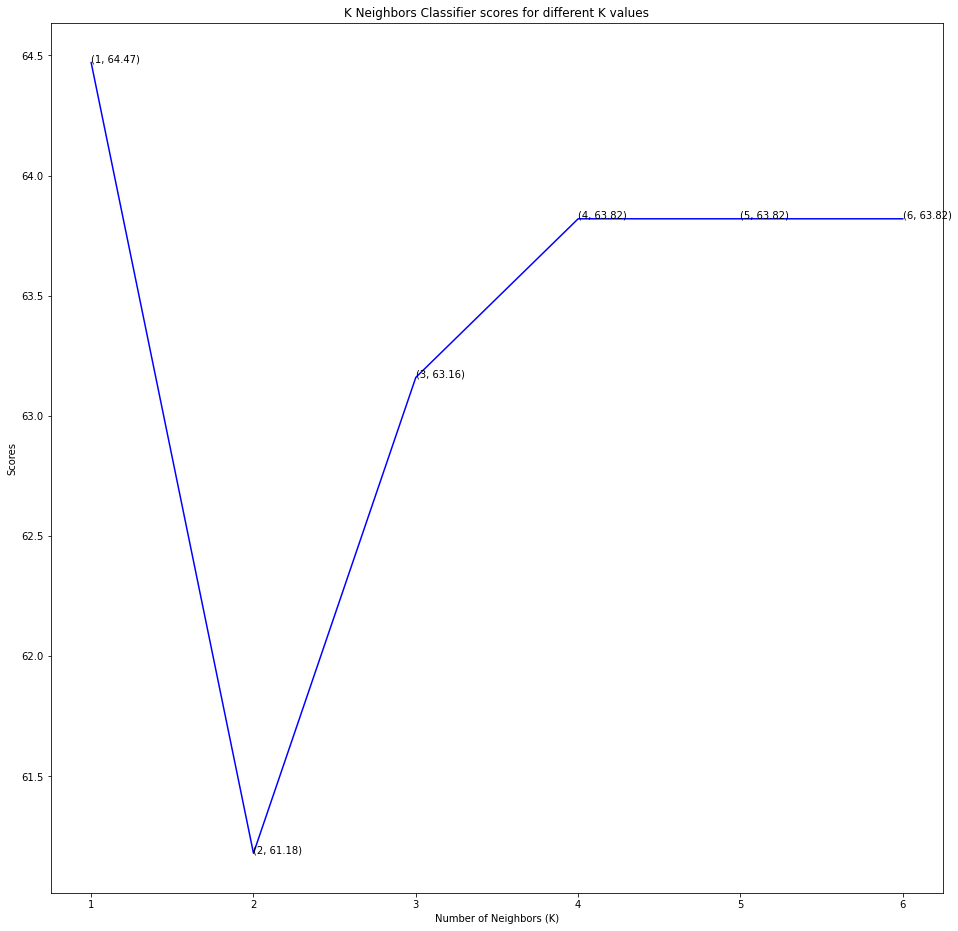

In [ ]:
plt.plot([ i for i in range(1, 7)], knn_score_lst, color = 'blue')
for i in range(1, 7):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 7)])

In [ ]:
#decision tree

decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x7fb62fd25390>,
 <a list of 10 Text major ticklabel objects>)

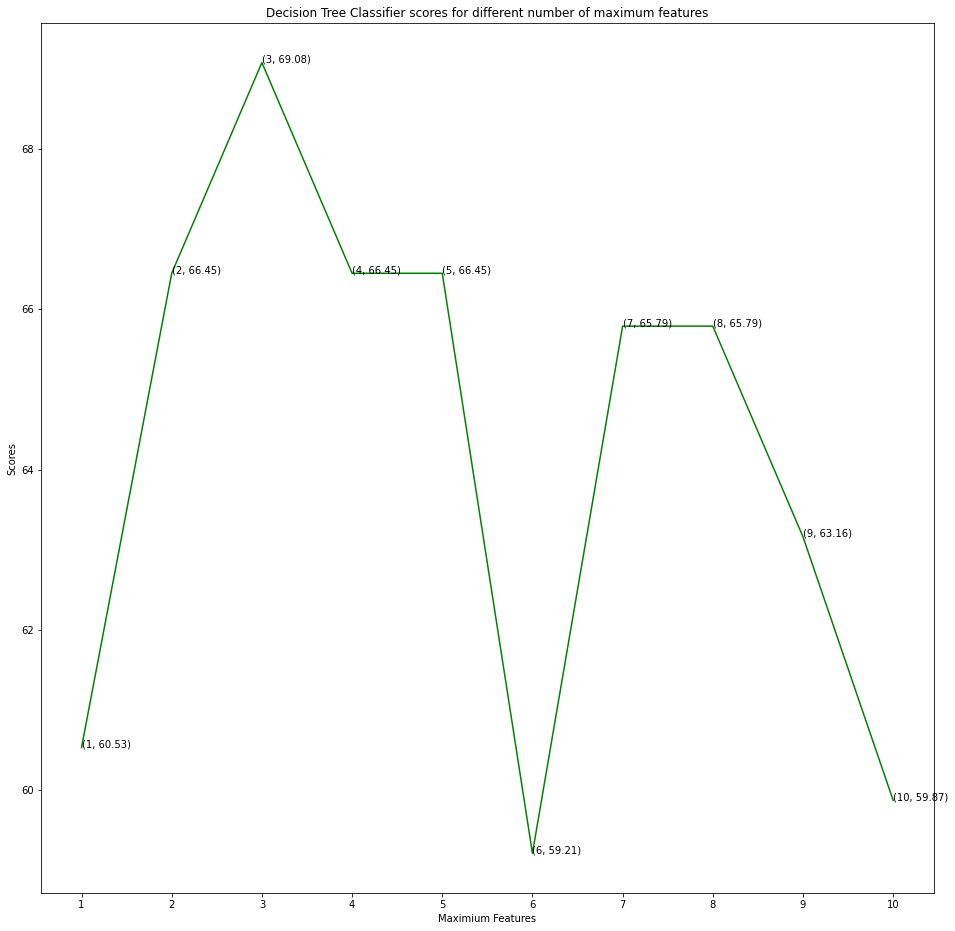

In [ ]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [ ]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

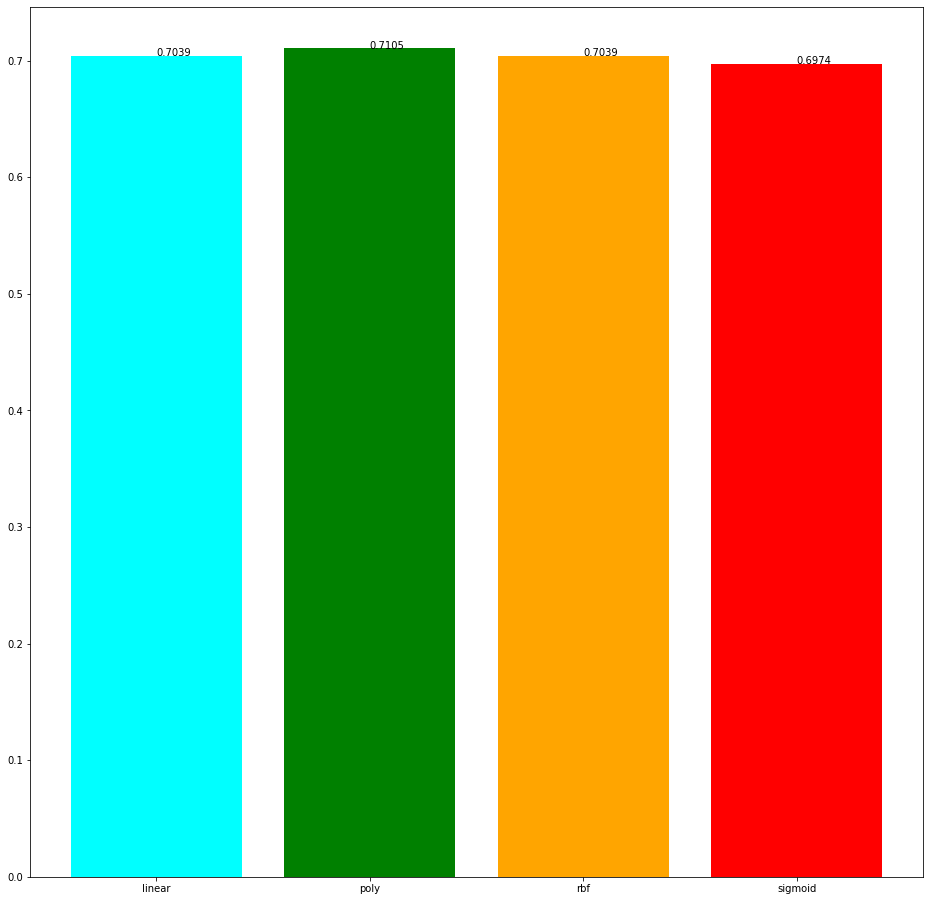

In [ ]:
plt.bar(kernels, svc_score_lst, color = ['cyan', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [ ]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)

0.6118421052631579

**ACCURACY COMPARISON**

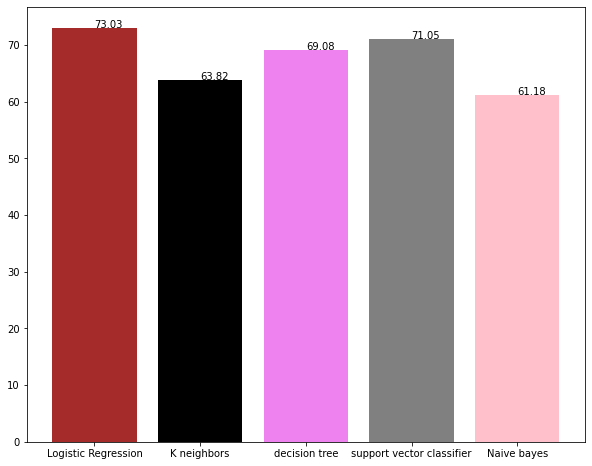

In [ ]:
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 73.03, 63.82, 69.08, 71.05, 61.18 ]
plt.bar(lst_x, lst_y, color = ['brown', 'black', 'violet', 'grey', 'pink'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])

*CLEARLY LOGISTIC REGRESSION SHOWED BEST RESULT*